# TP de Programmation Orientée Objet : (beaucoup de) balles rebondissantes

![dsf](https://github.com/glassus/nsi/blob/master/Terminale/Theme_2_Programmation/2.1_Programmation_Orientee_Objet/data/balles1.png?raw=1)

## 1. Prise en main de Pygame
> Attention, l'utilisation de Pygame au sein de Jupyter provoque des plantages de noyau. Il est préférable d'utiliser un autre IDE ou bien un https://repl.it/ (choisir le langage Pygame).  
Testez le code suivant :

In [2]:
import pygame, sys
import time
from pygame.locals import *



pygame.display.init()
fenetre = pygame.display.set_mode((640, 480))
fenetre.fill([0,0,0])

x = 300
y = 200
dx = 4
dy = -3
couleur = (45,170,250)

while True :
    fenetre.fill([0,0,0])
    pygame.draw.circle(fenetre,couleur,(x,y),10)
    
    x += dx
    y += dy
    
    pygame.display.update()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    
    time.sleep(0.1)

SystemExit: 

### 1.1  Rajout d'un rebond sur les parois
Modifiez le code précédent afin que la balle rebondisse sur chaque paroi (il suffit de modifier intelligemment les variables de vitesse ```dx``` et ```dy```).

### 1.2 Rajout d'une deuxième balle
Attention au nommage des variables...

### 1.3 Gestion de la collision entre les deux balles
1. À l'aide d'un schéma (papier-crayon !), mettez en évidence le test devant être réalisé pour détecter une collision.
2. Implémentez ce test et affichez "collision" en console lorsque les deux balles se touchent.
3. Pour l'illusion du rebond, échangez les valeurs respectives de ```dx``` et ```dy``` pour les deux balles.

### 1.4 Rajout d'une troisième balle et gestion du rebond avec les deux autres.
... vraiment ? Peut-on continuer comme précédemment ?

In [3]:
import pygame, sys
import time
from pygame.locals import *

ecran = (800,600)
taille = 20

pygame.display.init()
fenetre = pygame.display.set_mode(ecran)
fenetre.fill([0,0,0])

ax = 300
ay = 200
adx = 4
ady = -3
acouleur = (45,170,250)

bx = 100
by = 200
bdx = -4
bdy = 7
bcouleur = (250,0,250)




while True :
    fenetre.fill([0,0,0])
    pygame.draw.circle(fenetre,acouleur,(ax,ay),taille)
    pygame.draw.circle(fenetre,bcouleur,(bx,by),taille)
    
    ax += adx
    ay += ady

    bx += bdx
    by += bdy

    # rebonds sur les murs
    if ax < 0+taille/2 or ax > ecran[0]-taille/2 :
        adx = -adx
        
    if bx < 0+taille/2 or bx > ecran[0]-taille/2 :
        bdx = -bdx
        
    if ay < 0+taille/2 or ay > ecran[1]-taille/2 :
        ady = -ady
        
    if by < 0+taille/2 or by > ecran[1]-taille/2 :
        bdy = -bdy

    # collision
    if ((ax-bx)**2+(ay-by)**2)**0.5 < 2*taille :
        adx, bdx = bdx, adx
        ady, bdy = bdy, ady



    pygame.display.flip()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    
    time.sleep(0.01)


SystemExit: 

## 2. La POO à la rescousse : création d'une classe Balle

### 2.1 la classe Balle
L'objectif est que la méthode constructeur dote chaque nouvelle balle de valeurs aléatoires : abscisse, ordonnée, vitesse, couleur...  
Créez cette classe et instanciez une balle.

**Code final **

In [4]:
import pygame, sys
import time
from pygame.locals import *
from random import randint

clock = pygame.time.Clock()

ecran = (640,480)
FPS = 30

taille = 10

pygame.display.init()
fenetre = pygame.display.set_mode(ecran)
fenetre.fill([0,0,0])

class Balle :
    def __init__(self):
        self.x = randint(0,ecran[0])
        self.y = randint(0,ecran[1])       
        self.dx = randint(-5,5)
        self.dy = randint(-5,5)
        self.color = (randint(0,255),
                      randint(0,255),
                      randint(0,255))
        self.taille = taille
        
    def move(self):
        # mouvement de la balle self
        self.x += self.dx
        self.y += self.dy
        
        # rebond de la balle self
        if self.x < self.taille or self.x > ecran[0]-self.taille :
            self.dx = -self.dx
        if self.y < self.taille or self.y > ecran[1]-self.taille :
            self.dy = -self.dy
            
        # collision de la balle self avec les autres balles
        for b in liste_balles :
            if ((b.x-self.x)**2 + (b.y-self.y)**2)**0.5 < self.taille + b.taille :
                # on échange les dx
                b.dx, self.dx = self.dx, b.dx
                # on échange les dy
                b.dy, self.dy = self.dy, b.dy              
        
        
    
    def draw(self):
        pygame.draw.circle(fenetre,self.color,
                           (self.x,self.y),
                           self.taille)

liste_balles = []
for k in range(100):
    b = Balle()
    liste_balles.append(b)  
        
while True :

    fenetre.fill([0,0,0])
    for b in liste_balles :
        b.move()
        b.draw() 
    

    
    pygame.display.flip()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    clock.tick(FPS)


SystemExit: 

## 3. Épidémiologie

### 3.1 rajout d'un attribut «malade»

In [7]:
import pygame, sys
import time
from pygame.locals import *
from random import randint

clock = pygame.time.Clock()

nb_balles = 30

ecran = (640,480)
FPS = 30

taille = 10

pygame.display.init()
fenetre = pygame.display.set_mode(ecran)
fenetre.fill([0,0,0])

class Balle :
    def __init__(self):
        self.x = randint(0,ecran[0])
        self.y = randint(0,ecran[1])       
        self.dx = randint(-5,5)
        self.dy = randint(-5,5)
        self.color = (255,255,255)
        self.malade = False
        self.taille = taille
        
    def move(self):
        # mouvement de la balle self
        self.x += self.dx
        self.y += self.dy
        
        # rebond de la balle self
        if self.x < self.taille or self.x > ecran[0]-self.taille :
            self.dx = -self.dx
        if self.y < self.taille or self.y > ecran[1]-self.taille :
            self.dy = -self.dy
            
        # collision de la balle self avec les autres balles
        for b in liste_balles :
            if ((b.x-self.x)**2 + (b.y-self.y)**2)**0.5 < self.taille + b.taille :
                # on échange les dx
                b.dx, self.dx = self.dx, b.dx
                # on échange les dy
                b.dy, self.dy = self.dy, b.dy              
        
        
    
    def draw(self):
        if self.malade == True :
            self.color = (255,0,0)
            
        pygame.draw.circle(fenetre,self.color,
                           (self.x,self.y),
                           self.taille)

liste_balles = []
for k in range(nb_balles):
    b = Balle()
    liste_balles.append(b)  

liste_balles[0].malade = True    
    
    
while True :

    fenetre.fill([0,0,0])
    for b in liste_balles :
        b.move()
        b.draw() 
    

    
    pygame.display.flip()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    clock.tick(FPS)


SystemExit: 

### 3.2 rajout d'une contamination en cas de collision

In [14]:
import pygame, sys
import time
from pygame.locals import *
from random import randint

clock = pygame.time.Clock()

nb_balles = 30

ecran = (640,480)
FPS = 30

taille = 10

pygame.display.init()
fenetre = pygame.display.set_mode(ecran)
fenetre.fill([0,0,0])

class Balle :
    def __init__(self):
        self.x = randint(0,ecran[0])
        self.y = randint(0,ecran[1])       
        self.dx = randint(-5,5)
        self.dy = randint(-5,5)
        self.color = (255,255,255)
        self.malade = False
        self.taille = taille
        
    def move(self):
        # mouvement de la balle self
        self.x += self.dx
        self.y += self.dy
        
        # rebond de la balle self
        if self.x < self.taille or self.x > ecran[0]-self.taille :
            self.dx = -self.dx
        if self.y < self.taille or self.y > ecran[1]-self.taille :
            self.dy = -self.dy
            
        # collision de la balle self avec les autres balles
        for b in liste_balles :
            if ((b.x-self.x)**2 + (b.y-self.y)**2)**0.5 < self.taille + b.taille :
                # on échange les dx
                b.dx, self.dx = self.dx, b.dx
                # on échange les dy
                b.dy, self.dy = self.dy, b.dy 
                # contamination éventuelle
                contamine(b,self)
        
        
    
    def draw(self):
        if self.malade == True :
            self.color = (255,0,0)
            
        pygame.draw.circle(fenetre,self.color,
                           (self.x,self.y),
                           self.taille)

def contamine(b1, b2) :
    if b1.malade == True or b2.malade == True :
        b1.malade = True
        b2.malade = True
        
        
        
liste_balles = []
for k in range(nb_balles):
    b = Balle()
    liste_balles.append(b)  

liste_balles[0].malade = True    
    
    
while True :

    fenetre.fill([0,0,0])
    for b in liste_balles :
        b.move()
        b.draw() 
    

    
    pygame.display.flip()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    clock.tick(FPS)


SystemExit: 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### 3.3 Étude de la vitesse de contamination

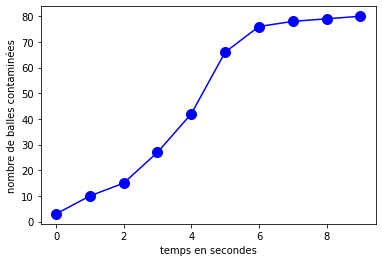

In [23]:
import pygame, sys
import time
from pygame.locals import *
from random import randint

clock = pygame.time.Clock()

nb_balles = 80

ecran = (640,480)
FPS = 25

taille = 10

pygame.display.init()
fenetre = pygame.display.set_mode(ecran)
fenetre.fill([0,0,0])

class Balle :
    def __init__(self):
        self.x = randint(0,ecran[0])
        self.y = randint(0,ecran[1])       
        self.dx = randint(-5,5)
        self.dy = randint(-5,5)
        self.color = (255,255,255)
        self.malade = False
        self.taille = taille
        
    def move(self):
        # mouvement de la balle self
        self.x += self.dx
        self.y += self.dy
        
        # rebond de la balle self
        if self.x < self.taille or self.x > ecran[0]-self.taille :
            self.dx = -self.dx
        if self.y < self.taille or self.y > ecran[1]-self.taille :
            self.dy = -self.dy
            
        # collision de la balle self avec les autres balles
        for b in liste_balles :
            if ((b.x-self.x)**2 + (b.y-self.y)**2)**0.5 < self.taille + b.taille :
                # on échange les dx
                b.dx, self.dx = self.dx, b.dx
                # on échange les dy
                b.dy, self.dy = self.dy, b.dy 
                # contamination éventuelle
                contamine(b,self)
        
        
    
    def draw(self):
        if self.malade == True :
            self.color = (255,0,0)
            
        pygame.draw.circle(fenetre,self.color,
                           (self.x,self.y),
                           self.taille)

def contamine(b1, b2) :
    if b1.malade == True or b2.malade == True :
        b1.malade = True
        b2.malade = True
        
        
        
liste_balles = []
for k in range(nb_balles):
    b = Balle()
    liste_balles.append(b)  

liste_balles[0].malade = True    

def nombre_malades():
    s = 0
    for b in liste_balles :
        if b.malade == True :
            s += 1
    return s

liste_nb_malades = []

c = 0

while c < 25*10 :
    c += 1
    
    fenetre.fill([0,0,0])
    for b in liste_balles :
        b.move()
        b.draw() 
    
    #print(nombre_malades())

    
    pygame.display.flip()
    
    # routine pour pouvoir fermer «proprement» la fenêtre Pygame
    
    if c % 25 == 0 :
        liste_nb_malades.append(nombre_malades())
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
            sys.exit()
    
    clock.tick(FPS)
    
    
pygame.display.quit()
#sys.exit()

x=[k for k in range(10)]
plt.xlabel('temps en secondes')
plt.ylabel('nombre de balles contaminées')
plt.plot(x,liste_nb_malades, marker = 'o', c = 'blue',  markersize = 10)
